In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [8]:
# Loading the housing price dataset (assuming the file name is "housing_price.csv")
url = 'amz_uk_price_prediction_dataset.csv'
df = pd.read_csv(url)

#Cuando quiero un df, hay que poner display y si solamente quiero imprimir; print
display(df.head())  
print(df.shape)

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers


(2443651, 9)


In [9]:
#### Part 1: Understanding Product Categories
#- Generate a frequency table for the product `category`.
frequency_table = df['category'].value_counts()
frequency_table


Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
                                           ...  
Plugs                                        107
Alexa Built-In Devices                       107
Motorbike Chassis                            107
Smart Home Security & Lighting               104
Smart Speakers                                54
Name: category, Length: 296, dtype: int64

In [10]:
# - Which are the top 5 most listed product categories?
frequency_table_top5 = df['category'].value_counts().head(5)
frequency_table_top5

Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
Name: category, dtype: int64

In [11]:
#sns.barplot(y=frequency_table_top5.index, x=frequency_table_top5.values, hue=frequency_table_top5.index)
#Gráfica con los número tal cual me los da la tabla, en la siguiente
#axes son los ejes del x

[]

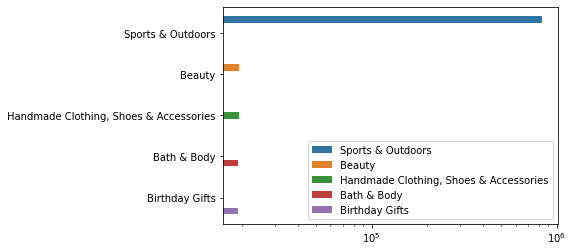

In [12]:
#2. Visualizations
# Display the distribution of products across different categories using a bar chart.
#sns.countplot()
fig, axes = plt.subplots()
sns.barplot(y=frequency_table_top5.index, x=frequency_table_top5.values, hue=frequency_table_top5.index, ax=axes)
axes.semilogx()


#sns.move_legend(ax, "lower right")

In [13]:

### Part 2: Delving into Product Pricing
#1. **Measures of Centrality**:
#Calculate the mean, median, and mode for the `price` of products.
mean_price = df['price'].mean()
median_price = df['price'].median()
mode_price = df['price'].mode()

print(f"Mean:{mean_price}")
print(f"Median: {median_price}")
print(f"Mode: {mode_price}")


Mean:89.24380943985244
Median: 19.09
Mode: 0    9.99
dtype: float64


In [14]:
#- What's the average price point of products listed? How does this compare with the most common price point (mode)?
#min_price = df['price'].min()
#max_price = df['price'].max()
diference_mean_mode = mean_price - mode_price
print(f"range price: {diference_mean_mode}")

range price: 0    79.253809
dtype: float64


In [ ]:
#2.**Measures of Dispersion**:
#- Determine the variance, standard deviation, range, and interquartile range for product `price`.
variance_price = df['price'].var()
std_dev_price = df['price'].std()
min_price = df['price'].min()
max_price = df['price'].max()
range_price = max_price - min_price
print(f"variance: {variance_price}")
print(f"std_dev_price: {std_dev_price}")
print(f"min: {min_price}")
print(f"max: {max_price}")
print(f"range price: {range_price}")

#- How varied are the product prices? Are there any indicators of a significant spread in prices?
#yes, there is a significant spread. Standard deviation and range 

variance: 119445.48532256528
std_dev_price: 345.60886175352226
min: 0.0
max: 100000.0
range price: 100000.0


In [24]:

### Part 3: Unpacking Product Ratings
#1. **Measures of Centrality**:
mean_rating = df['reviews'].mean()
median_rating = df['reviews'].median()
mode_rating = df['reviews'].mode()

print(f"Mean:{mean_rating}")
print(f"Median: {median_rating}")
print(f"Mode: {mode_rating}")



Mean:480.6277569914853
Median: 0.0
Mode: 0    0
dtype: int64


In [25]:
#2. **Measures of Dispersion**:
variance_rating = df['reviews'].var()
std_dev_rating= df['reviews'].std()
min_rating = df['reviews'].min()
max_rating = df['reviews'].max()
range_rating = max_rating - min_rating
print(f"variance: {variance_rating}")
print(f"std_dev_rating: {std_dev_rating}")
print(f"min: {min_rating}")
print(f"max: {max_rating}")
print(f"range rating: {range_rating}")


variance: 35332611.92181505
std_dev_rating: 5944.124150942261
min: 0
max: 1356658
range rating: 1356658


In [27]:
#3. **Shape of the Distribution**:
skewness_rating = df['reviews'].skew()
kurtosis_rating = df['reviews'].kurtosis()

skewness_rating, kurtosis_rating

(102.81782179557166, 17741.01460473757)

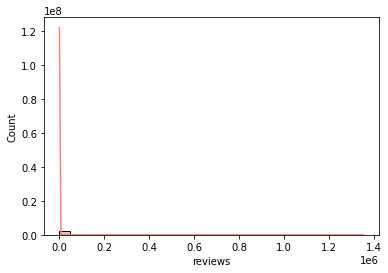

In [ ]:
#4. **Visualizations**:
fig, axes = plt.subplots()
sns.histplot(df['reviews'], kde=True, bins=30, color="salmon", ax=axes);
plt.show()